# K-means clustering
## Introduction
K-means is an example of unsupervised learning algorithms for clustering problems.
Suppose we have a data set $X=\{ \mathbf{x}_1 \cdots \mathbf{x}_N \}$ consisting of $N$ observations of a random $D$-dimensional Euclidean variable $\mathbf{x}$. Our goal is to partition the data set into some number $K$ of clusters, located around their centroids $\mathbf{m}_k=\{\mathbf{\mu}_1 \cdots \mathbf{\mu}_K \}$. We assume that the value of $K$ is given.

K-means clustering can be solved by Expectation Maximisation (EM) algorithm which consists of two steps: E-step and M-step.
On each E-step, we find the Euclidean distance between $N$ data points and $K$ cluster centers. The most probable cluster for each data sample $\mathbf{x}_n$ is the one with nearest centroid:

\begin{align}
z_n^*=\text{arg} \, \min\limits_{k} \parallel \mathbf{x}_n - \mathbf{\mu}_k \parallel^2
\end{align}

The M-step updates each cluster center by computing the mean of all points assigned to it:

\begin{align}
\mathbf{\mu}_k=\frac{1}{N_k} \sum_{n:z_n = k} \mathbf{x}_n
\end{align}

The pseudo-code of K-means clustering can be summarised as following:

<table>
  <tr>
    <td>
    Randomly select cluster centers ($\mathbf{m}_k$) as initial centroids; <br/> 
<b>while</b> <i>centroids change</i> <b>do</b>:     
&emsp; <b>E-step</b>: <br/> 
&emsp; Calculate the distance between each data point and cluster center (centroid); <br /> 
&emsp; Assign each data point to its closest cluster center (centroid): $z_n^*=\text{arg} \, \min\limits_{k} \parallel \mathbf{x}_n - \mathbf{\mu}_k \parallel^2$; <br /> 
&emsp; Form K clusters by assigning each point to its closest centroid; <br /> 
<br/> 
&emsp; <b>M-step</b>: <br />
&emsp; Update each cluster center by computing the mean of all points assigned to it: $\mathbf{\mu}_k=\frac{1}{N_k} \sum_{n:z_n = k} \mathbf{x}_n$; <br /> 
<b>end</b> <br /> 
<b>Result</b>: Cluster indices of each data point (assignments)    
  </td>
  </tr>
</table>

## Tutorial 1: Clustering on a simple toy data
In this subsection, we implement K-means to cluster a simple toy data. 
First, we import all necessary libraries.

In [1]:
# We import all necessary libraries
from pyKmeans import Kmeans # This imports the Kmeans function (which we created)
import numpy as np # This imports numerical python (numpy) library
import matplotlib.pyplot as plt # This imports matplotlib library for plotting


Then, we create a simple data based on two independent multivariate Gaussian distributions and we plot this data.

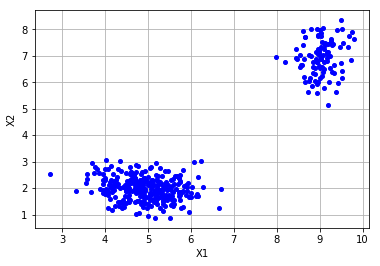

In [2]:
# We create synthetic data using two Gaussian distributions
# First, we determine the mean and standard deviation of two Gaussian distributions
mu1=np.array([5,2]); sigma1=np.array([[0.4,-0.0255],[-0.0255,0.2]])
mu2=np.array([9,7]); sigma2=np.array([[0.10,0],[0,0.4]])

# Second, we determine the number of data points on each Gaussian distribution
N1=300; N2=100

# Third, we add these properties into multivariate normal dist. function in numpy
X1=np.random.multivariate_normal(mu1, sigma1, N1)
X2=np.random.multivariate_normal(mu2, sigma2, N2)
X = np.concatenate((X1, X2), axis=0) # combine X1 and X2 as data X

# Fourth, we plot the synthetic data based on two Gaussian distribution function 
plt.plot(X[:,0],X[:,1],'bo',linewidth=2.0,markersize=4.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

The result in the Figure shows very well separated data.
Of course, it is very easy to visualize the separation/group by human eye, but clustering aims to do this process automatically. K-means clustering is one of simple algorithm to cluster/group data sets.

In this tutorial, the number of clusters K is assumed to be known. There are some automatic
methods in determining K parameter, but they are not discussed here.

We then apply <i>K-means</i> function on the data (if you are interested the detailed of the algorithm, you can take a look at <i>Kmeans.py</i>). The function returns the cluster indices as well as the cluster's
centroids. Finally, we plot the data for each cluster using different colour.

The produced Figure demonstrates how K-means algorithm successfully forms two clusters in the data.
The above problem of course is very easy to visualize because the generated data set is very well separated. The next exercise will demonstrate more challenging problem. The exercise is a good example to understand how K-means can be useful in practice.

mu_k (centroid) values: 
 [[9.03032846 6.92698235]
 [4.94787166 1.98681873]]


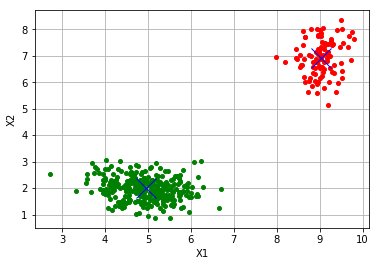

In [3]:
# In this part, we will apply K-means clustering algorithm to the above generated data

K=2 # determine the number of cluster

assignment1, mu_k = Kmeans(X,K)

k1=np.argwhere(assignment1==1) # index of cluster 1
k2=np.argwhere(assignment1==2) # index of cluster 2

plt.plot(X[k1,0],X[k1,1],'ro',X[k2,0],X[k2,1],'go',linewidth=2.0,markersize=4.0)
plt.plot(mu_k[0,0],mu_k[0,1],'bx',mu_k[1,0],mu_k[1,1],'bx',linewidth=20.0,markersize=20.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

# Exercise:
# Bring the closer the means of Gaussian distribution, what is the effect of K-means clustering
# Play around with the generated dataset and see K-means effect
# Here we use K=2, because we know we generated the data from two Gaussian distributions, what happened if you change K

# Homework:
# Understand the K-means clustering function
# Change the distance metrics, from Euclidean distance to be Manhattan distance


## Exercise 1: K-means clustering on synthetic data
### Exercise 1.a:
As instructed earlier in the simple exercise above, vary the aforementioned parameters [mu1,mu2],[sigma1,sigma2] and [N1,N2] and see the plots. You may produce two groups which are not well separated (or at least close each others). Perform K-means clustering on that data.
### Exercise 1.b:
Create synthetic 3D-data using a multivariate Gaussian distribution, select appropraiately parameters [mu1,mu2,mu3],[sigma1,sigma2,sigma3] and [N1,N2,N3] and see the plots. Perform K-means clustering on that data.

## Exercise 2: K-means clustering on chemical wine data

This exercise is a continuation of previous wine exercise (PCA). 
We will use the wine data set, described in the previous notebook.

Based on the eigenvalues generated by PCA in the data, it is known that there are three most dominant PCs. 
The objective is to apply K-means on the reduced data (using the first three PCs) for clustering three different groups of wine. 
We know the actual classiffication of the wine from the data set into three types, so we hope that the clusters generated through K-means mimic the actual wine types. 

### Exercise 2.a:
We provide the template for this exercise below.
Perform K-means on the reduced data (using only three PCs). Produce a 3D plot of the grouped wine data based on clustering and compare the results with the actual wine classes.

### Exercise 2.b:
Perform K-means clustering without applying PCA on the data and compare the results with the exercise 2.a.

mu_k (centroid) values: 
 [[ 2.73621144  1.21077507]
 [-2.23406751  0.77298213]
 [ 0.25174456 -1.79222227]]


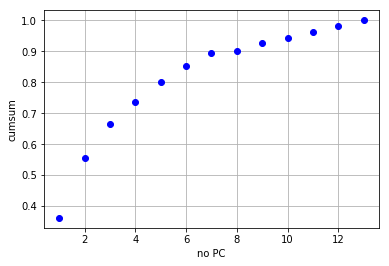

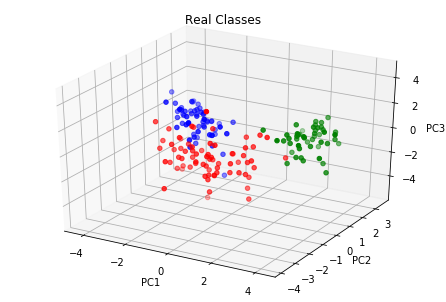

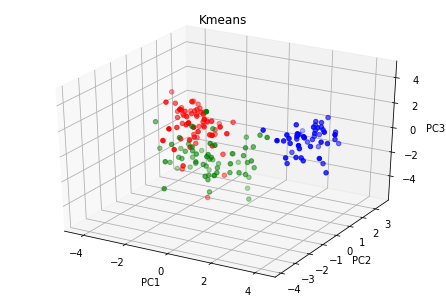

In [4]:
# We import all necessary libraries
from pyPCA import PCA, zscore   # import the same functions made in the first notebook
from mpl_toolkits.mplot3d import Axes3D
import pylab


# We load the wine data again
dataIn = np.genfromtxt('./data/wineInputs.txt', delimiter=',')
dataOut = np.genfromtxt('./data/wineOutputs.txt', delimiter=',')
dataOut=np.int_(dataOut)

## # do the zscore and PCA of dataIn
X = zscore(dataIn) # normalization

# Using PCA.py function, apply PCA on the normalized data:
[V, Ypca ,D] = PCA(X) # applying PCA


# determine the number of cluster
K = 3 # We assume that we know the number of cluster

## Using Kmeans.py function, apply K-means clustering on the first three PCs data
assignment1, mu_k = Kmeans(Ypca[:,0:2],K) # calculate clusters and centroids

# Below is to re-show the cumulative sum of PCs
noPC=np.linspace(1,len(D),len(D))
idc=np.divide(np.cumsum(D),np.sum(D))
plt.figure(1)
plt.plot(noPC,idc,'bo') # re-plot the data
plt.xlabel('no PC')
plt.ylabel('cumsum')
plt.grid()
plt.show()

# plot the real classes here
fig1 = pylab.figure()
ax = Axes3D(fig1)
ax.scatter(Ypca[dataOut==1,0],Ypca[dataOut==1,1],Ypca[dataOut==1,2],c='b')
ax.scatter(Ypca[dataOut==2,0],Ypca[dataOut==2,1],Ypca[dataOut==2,2],c='r')
ax.scatter(Ypca[dataOut==3,0],Ypca[dataOut==3,1],Ypca[dataOut==3,2],c='g')
plt.title('Real Classes')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Plot the wine classes based on K-means clustering here
fig2 = pylab.figure()
ax = Axes3D(fig2)
ax.scatter(Ypca[assignment1==1,0],Ypca[assignment1==1,1],Ypca[assignment1==1,2],c='b')
ax.scatter(Ypca[assignment1==2,0],Ypca[assignment1==2,1],Ypca[assignment1==2,2],c='r')
ax.scatter(Ypca[assignment1==3,0],Ypca[assignment1==3,1],Ypca[assignment1==3,2],c='g')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Kmeans')

plt.show()


## Exercise 3: K-means clustering on atmospheric variables

Atmospheric new-particle formation (NPF) is an important source of climatically
relevant atmospheric aerosol particles. 
NPF is the episodes where the ultra-fine aerosol particles appearing in the atmosphere and growing subsequently to larger sizes until they reach sizes where they potentially scatter solar irradiation and impact cloud condensation nuclei (CCN).
This fact has motivated scientists across the world to study the atmospheric variables which contribute to the process of NPF. Below Figure shows two examples of new-particle formation events, the Figures on the left and right hand sides constitute non-event and event days, respectively.

<table>
  <caption align="bottom">Examples of non-event and event days at Hyyti{\"a}l{\"a}, SMEAR II, Finland, in May 2005.</caption>
  <tr><td>
    <th><img src="images/NonEventDay.png" width="200px"></th>
    <th><img src="images/EventDay.png" width="200px"></th>
  </tr>
</table>

In this exercise, we have a data set consists of two daily averaged atmospheric variables: global radiation ($W/ms^{-2}$) and Relative Humidty (%). They were measured from January 1996 - December 2014 at Hyyti{\"a}l{\"a}, SMEAR II, Finland. 
The below figure shows the scatter plot between RH and Global


mu_k (centroid) values: 
 [[ 58.45637234 294.09059619]
 [ 91.09286487  55.21649593]]


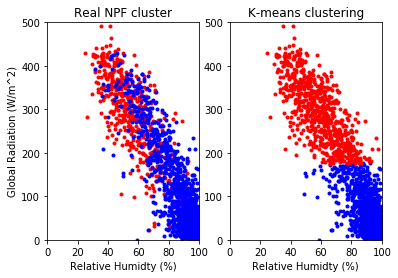

In [5]:
# Using numpy to load file of relative humidity and solar radiation: 
Data = np.loadtxt('./data/DataForClusteringFinal.txt', skiprows=1)

# Relative Humidty (RH) and Global radiation to NPF
# X is the data which we will use as a unsupervised learning
# y is the labels which we will use later for comparison
X = np.stack((Data[:,1],Data[:,2]),axis=1)
y = np.stack((Data[:,3],Data[:,4]),axis=1)

#idxNotNaN = ~np.isnan(X)
idxNotNaN = ~np.isnan(X).any(axis=1)
X = X[idxNotNaN,:]
y = y[idxNotNaN,:]
# Kmeans clustering algorithm
#from sklearn.cluster import KMeans
#clus = KMeans(n_clusters=2, random_state=0).fit(X)
#idx = clus.labels_

idx, mu_k = Kmeans(X,2) # calculate clusters and centroids


fig = plt.figure()
ax1 = fig.add_subplot(122)
#plt.hold(True)
#plt.plot(X[idx==0,0],X[idx==0,1],'b.')
plt.plot(X[idx==2,0],X[idx==2,1],'b.')
plt.plot(X[idx==1,0],X[idx==1,1],'r.')
plt.title('K-means clustering')
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.xlabel('Relative Humidty (%)')
plt.ylabel('Global Radiation (W/m^2)')
#plt.hold(False)

ax1 = fig.add_subplot(121)
#plt.hold(True)
# plot event:
idxE=np.where(y[:,0]==1)
plt.plot(X[idxE,0],X[idxE,1],'r.')
# plot non-event:
idxE=np.where(y[:,1]==1)
plt.plot(X[idxE,0],X[idxE,1],'b.')
plt.title('Real NPF cluster')
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.xlabel('Relative Humidty (%)')
plt.ylabel('Global Radiation (W/m^2)')
#plt.hold(False)

plt.show()